In [83]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


import pickle

from tqdm import tqdm
import os

In [84]:
with open('./Sonnets.txt') as f:
    content = f.readlines()

content = [x.strip() for x in content] 

In [85]:
texts = []
z = []
for i in content:
    if i.isnumeric():
        texts.append(z)
        z = []
        continue
    else:
        z.append(i)

In [86]:
t = []
for i in texts:
    x = ' '.join(i)
    t.append(x)

In [87]:
data = pd.DataFrame(t[1:], columns=['sonnet'])

In [88]:
data.to_csv('sonnets_tabular.csv')

In [89]:
data = pd.read_csv('./sonnets_tabular.csv')

In [90]:
data.head()

,Unnamed: 0,sonnet
0,0,"From fairest creatures we desire increase, Th..."
1,1,"When forty winters shall besiege thy brow, An..."
2,2,Look in thy glass and tell the face thou view...
3,3,"Unthrifty loveliness why dost thou spend, Upo..."
4,4,Those hours that with gentle work did frame T...


In [91]:
# printing some random sonnets
sent_0 = data['sonnet'].values[0]
print(sent_0)
print("="*50)

sent_10 = data['sonnet'].values[10]
print(sent_10)
print("="*50)

sent_15 = data['sonnet'].values[15]
print(sent_15)
print("="*50)

sent_49 = data['sonnet'].values[49]
print(sent_49)
print("="*50)

 From fairest creatures we desire increase, That thereby beautyâ€™s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feedâ€™st thy lightâ€™s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the worldâ€™s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And, tender churl, makâ€™st waste in niggarding: Pity the world, or else this glutton be, To eat the worldâ€™s due, by the grave and thee.  
 As fast as thou shalt wane so fast thou growâ€™st, In one of thine, from that which thou departest, And that fresh blood which youngly thou bestowâ€™st, Thou mayst call thine, when thou from youth convertest, Herein lives wisdom, beauty, and increase, Without this folly, age, and cold decay, If all were minded so, the times should cease, And threescore year would make t

In [92]:
# remove urls from text python
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_10 = re.sub(r"http\S+", "", sent_10)
sent_15 = re.sub(r"http\S+", "", sent_15)
sent_49 = re.sub(r"http\S+", "", sent_49)

print(sent_0)

 From fairest creatures we desire increase, That thereby beautyâ€™s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feedâ€™st thy lightâ€™s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the worldâ€™s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And, tender churl, makâ€™st waste in niggarding: Pity the world, or else this glutton be, To eat the worldâ€™s due, by the grave and thee.  


In [93]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [94]:
sent_15 = decontracted(sent_15)
print(sent_15)
print("="*50)

 But wherefore do not you a mightier way Make war upon this bloody tyrant Time? And fortify your self in your decay With means more blessed than my barren rhyme? Now stand you on the top of happy hours, And many maiden gardens yet unset, With virtuous wish would bear you living flowers, Much liker than your painted counterfeit: So should the lines of life that life repair Which this (Timeâ€™s pencil) or my pupil pen Neither in inward worth nor outward fair Can make you live your self in eyes of men. To give away your self, keeps your self still, And you must live drawn by your own sweet skill.  


In [95]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

From fairest creatures we desire increase, That thereby beautyâ€™s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feedâ€™st thy lightâ€™s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the worldâ€™s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And, tender churl, makâ€™st waste in niggarding: Pity the world, or else this glutton be, To eat the worldâ€™s due, by the grave and thee.


In [96]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_15 = re.sub('[^A-Za-z0-9]+', ' ', sent_15)
print(sent_15)

 But wherefore do not you a mightier way Make war upon this bloody tyrant Time And fortify your self in your decay With means more blessed than my barren rhyme Now stand you on the top of happy hours And many maiden gardens yet unset With virtuous wish would bear you living flowers Much liker than your painted counterfeit So should the lines of life that life repair Which this Time s pencil or my pupil pen Neither in inward worth nor outward fair Can make you live your self in eyes of men To give away your self keeps your self still And you must live drawn by your own sweet skill 


In [97]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [98]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_sonnets = []
# tqdm is for printing the status bar
for sentance in tqdm(data['sonnet'].values):
    sentance = re.sub(r"http\S+", "", sentance)
     #sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_sonnets.append(sentance.strip())

100%|██████████████████████████████████████| 153/153 [00:00<00:00, 1416.57it/s]


In [99]:
preprocessed_sonnets[:2]

['fairest creatures desire increase thereby beauty rose might never die riper time decease tender heir might bear memory thou contracted thine bright eyes feed st thy light flame self substantial fuel making famine abundance lies thy self thy foe thy sweet self cruel thou art world fresh ornament herald gaudy spring within thine bud buriest thy content tender churl mak st waste niggarding pity world else glutton eat world due grave thee',
 'forty winters shall besiege thy brow dig deep trenches thy beauty field thy youth proud livery gazed tattered weed small worth held asked thy beauty lies treasure thy lusty days say within thine deep sunken eyes eating shame thriftless praise much praise deserv thy beauty use thou couldst answer fair child mine shall sum count make old excuse proving beauty succession thine new made thou art old see thy blood warm thou feel st cold']

In [100]:
processed_sonnets = pd.DataFrame(preprocessed_sonnets, columns=['processed sonnets'])

## Most important word of each sonnet

In [101]:
len(preprocessed_sonnets)

153

In [102]:
tf_idf_vect = TfidfVectorizer(min_df=5)
tf_idf_vect.fit(preprocessed_sonnets)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_sonnets)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including unigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['absence', 'age', 'ah', 'alone', 'although', 'another', 'antique', 'argument', 'art', 'away']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (153, 371)
the number of unique words including unigrams  371


In [103]:
features = tf_idf_vect.get_feature_names()

In [104]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [105]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)


In [106]:
z = []
for i in range(len(preprocessed_sonnets)):
    z.append(top_feats_in_doc(final_tf_idf,features, i , top_n = 1)['feature'][0])

In [107]:
imp_tf = pd.DataFrame(z, columns=['Most important word'])

## Most frequent word of each sonnet.

In [125]:
count_vector = CountVectorizer(preprocessed_sonnets)
count_vector.fit(preprocessed_sonnets)
count_vector.get_feature_names()[:2]

['abhor', 'abide']

In [109]:
doc_array = count_vector.transform(preprocessed_sonnets).toarray()
doc_array


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [110]:
frequency_matrix = pd.DataFrame(doc_array,index=preprocessed_sonnets,columns=count_vector.get_feature_names())
frequency_matrix.head(1)

,abhor,abide,able,absence,absent,abundance,abundant,abuse,abused,abuses,...,yellow,yellowed,yet,yield,yore,young,youngly,youth,youthful,zealous
fairest creatures desire increase thereby beauty rose might never die riper time decease tender heir might bear memory thou contracted thine bright eyes feed st thy light flame self substantial fuel making famine abundance lies thy self thy foe thy sweet self cruel thou art world fresh ornament herald gaudy spring within thine bud buriest thy content tender churl mak st waste niggarding pity world else glutton eat world due grave thee,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
z = []
for i in range(len(frequency_matrix)):
    z.append(frequency_matrix.iloc[i].idxmax())

In [112]:
most_frequent = pd.DataFrame(z, columns=['Most frequent word'])

In [113]:
df = processed_sonnets['processed sonnets'].str.cat(imp_tf['Most important word'])

### Tagging each sonet with its Most frequent and Most important word.

In [114]:
final_data = pd.concat([processed_sonnets, most_frequent['Most frequent word'], imp_tf['Most important word']], axis=1)
final_data.head()

,processed sonnets,Most frequent word,Most important word
0,fairest creatures desire increase thereby beau...,thy,world
1,forty winters shall besiege thy brow dig deep ...,thy,thy
2,look thy glass tell face thou viewest time fac...,thou,thou
3,unthrifty loveliness dost thou spend upon thy ...,thy,dost
4,hours gentle work frame lovely gaze every eye ...,beauty,winter


In [115]:
final_data

,processed sonnets,Most frequent word,Most important word
0,fairest creatures desire increase thereby beau...,thy,world
1,forty winters shall besiege thy brow dig deep ...,thy,thy
2,look thy glass tell face thou viewest time fac...,thou,thou
3,unthrifty loveliness dost thou spend upon thy ...,thy,dost
4,hours gentle work frame lovely gaze every eye ...,beauty,winter
5,let not winter ragged hand deface thee thy sum...,ten,times
6,lo orient gracious light lifts burning head ey...,age,looks
7,music hear hear st thou music sadly sweets swe...,thou,one
8,fear wet widow eye thou consum st thy self sin...,world,world
9,shame deny thou bear st love thy self art unpr...,thou,thy


## Related sonnets

We are clustering the related sonnets together.

In [116]:
# Generating bag of words features.
count_vect = CountVectorizer()
bow = count_vect.fit_transform(preprocessed_sonnets)
bow.shape

(153, 2947)

In [117]:
# Importing k-Means class from sklearn
from sklearn.cluster import KMeans

In [118]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

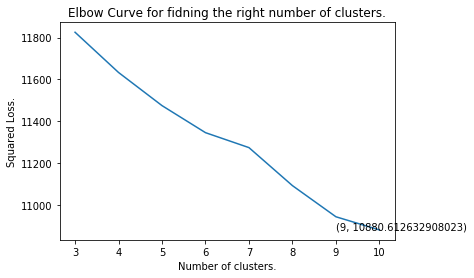

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  10880.612632908023


In [119]:
# Choosing the best cluster using Elbow Method.
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster, n_jobs = -1).fit(bow) # Training Clustering.
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve for fidning the right number of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [120]:
# Training the best model --
model = KMeans(n_clusters = optimal_clusters, n_jobs = -1)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [121]:
# Giving Labels/assigning a cluster to each sonnet
df = data
df['Label'] = model.labels_
df.head(5)

,Unnamed: 0,sonnet,Label
0,0,"From fairest creatures we desire increase, Th...",5
1,1,"When forty winters shall besiege thy brow, An...",7
2,2,Look in thy glass and tell the face thou view...,2
3,3,"Unthrifty loveliness why dost thou spend, Upo...",1
4,4,Those hours that with gentle work did frame T...,3


In [122]:
# How many sonnet belong to each cluster ->
df.groupby(['Label'])['sonnet'].count()

Label
0     7
1    11
2    46
3    46
4     3
5     9
6    27
7     2
8     2
Name: sonnet, dtype: int64

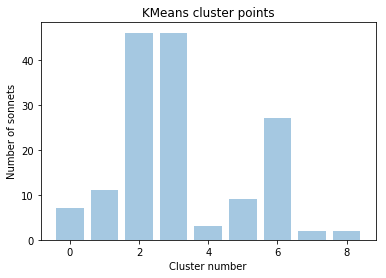

In [123]:
plt.bar([x for x in range(optimal_clusters)], df.groupby(['Label'])['sonnet'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of sonnets")
plt.show()

In [124]:
# Reading a sonet which belong to each group.
for i in range(optimal_clusters):
    print("A sonnet of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Label']).groups[i][0]]['sonnet'])
    print('\n')
    print("_" * 70)

A sonnet of assigned to cluster  0
----------------------------------------------------------------------
 When I do count the clock that tells the time, And see the brave day sunk in hideous night, When I behold the violet past prime, And sable curls all silvered oâ€™er with white: When lofty trees I see barren of leaves, Which erst from heat did canopy the herd And summerâ€™s green all girded up in sheaves Borne on the bier with white and bristly beard: Then of thy beauty do I question make That thou among the wastes of time must go, Since sweets and beauties do themselves forsake, And die as fast as they see others grow, And nothing â€™gainst Timeâ€™s scythe can make defence Save breed to brave him, when he takes thee hence.  


______________________________________________________________________
A sonnet of assigned to cluster  1
----------------------------------------------------------------------
 Unthrifty loveliness why dost thou spend, Upon thy self thy beautyâ€™s legacy? N